# Question 1

Write a python function that returns $2\sin(x^2) + \ln(|x|) + 1$ for a given real number $x$.

In [131]:
import math

def calc(degrees):
    return 2*(math.sin(math.radians(degrees))**2) + math.log(abs(degrees)) + 1

calc(30)

4.901197381662156

# Question 2

Write a python function that takes

* A function `f(x)`
* A pair of real numbers `(a,b)`
* An integer `N`

as input and returns the Riemann sum of `f(x)` on the interval `[a,b]` with `N` equal subdivisions.

In [132]:
#Reference: https://www.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/

def riemann_sum(f,a,b,N,method='midpoint'):
    '''Compute the Riemann sum of f(x) over the interval [a,b].

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a , b : numbers
        Endpoints of the interval [a,b]
    N : integer
        Number of subintervals of equal length in the partition of [a,b]
    method : string
        Determines the kind of Riemann sum:
        right : Riemann sum using right endpoints
        left : Riemann sum using left endpoints
        midpoint (default) : Riemann sum using midpoints

    Returns
    -------
    float
        Approximation of the integral given by the Riemann sum.
    '''
    dx = (b - a)/N
    x = np.linspace(a,b,N+1)

    if method == 'left':
        x_left = x[:-1]
        return np.sum(f(x_left)*dx)
    elif method == 'right':
        x_right = x[1:]
        return np.sum(f(x_right)*dx)
    elif method == 'midpoint':
        x_mid = (x[:-1] + x[1:])/2
        return np.sum(f(x_mid)*dx)
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")

print(riemann_sum(np.sin,0,np.pi/2,100))
print(riemann_sum(np.sin,0,np.pi/2,100, method='left'))
print(riemann_sum(np.sin,0,np.pi/2,100, method='right'))

1.0000102809119054
0.992125456605633
1.007833419873582


# Question 3

* Pull 100 uniformly random numbers from the interval $[0,1]$ as an array `xs`.
* Add 0 at the beginning of the array, and 1.0 at the end.
* Sort the array `xs` from smallest to the largest.
* Calculate its discrete derivative `ys`, i.e. let $y_i = x_{i+1} - x_i$

In [133]:
import numpy as np
np.random.seed(1)

xs = np.random.uniform(0, 1, size = (100))
xs = np.sort(np.append(np.append(0, xs), 1))
ys = xs[1:len(xs)] - xs[0:(len(xs)-1)]

print("xs length is", len(xs))
print("ys length is", len(ys))
print("xs values: \n", xs)
print("ys values: \n", ys)

xs length is 102
ys length is 101
xs values: 
 [0.00000000e+00 1.14374817e-04 2.87032703e-03 1.82882773e-02
 1.93669579e-02 2.73875932e-02 3.90547832e-02 4.99534589e-02
 5.33625451e-02 8.50442114e-02 9.23385948e-02 9.83468338e-02
 1.02334429e-01 1.03226007e-01 1.14745973e-01 1.30028572e-01
 1.37474704e-01 1.39276347e-01 1.40386939e-01 1.46728575e-01
 1.46755891e-01 1.65354197e-01 1.69830420e-01 1.86260211e-01
 1.98101489e-01 2.04452250e-01 2.11628116e-01 2.37026980e-01
 2.65546659e-01 2.69927892e-01 2.80443992e-01 2.87775339e-01
 2.93614148e-01 3.02332573e-01 3.13424178e-01 3.15515631e-01
 3.45560727e-01 3.47765860e-01 3.48898342e-01 3.96767474e-01
 3.97676837e-01 4.08136803e-01 4.14055988e-01 4.14179270e-01
 4.17022005e-01 4.17304802e-01 4.19194514e-01 4.21107625e-01
 4.28091190e-01 4.47893526e-01 4.49912133e-01 4.91573159e-01
 5.14889112e-01 5.33165285e-01 5.35896406e-01 5.38816734e-01
 5.58689828e-01 5.73679487e-01 5.74117605e-01 5.78389614e-01
 5.86555041e-01 5.89305537e-01 6.17144

# Question 4

* Pull 100 uniformly random numbers from the interval $[0,1]$ into an array `xs`.
* Pull 100 random numbers from the Gaussion distribution with $\mu=0$ and $\sigma=1.0$ into an array `ys`.
* Scatter plot `xs` against `ys` using `matplotlib`


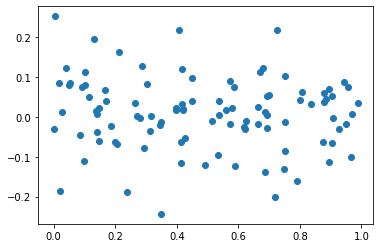

In [134]:
import numpy as np
np.random.seed(1)

xs = np.random.uniform(0, 1, size = (100))

mu, sigma = 0, 0.1
ys = np.random.normal(mu, sigma, size = (100))

import matplotlib.pyplot as plt

plt.scatter(xs, ys)
plt.show()

# Question 5

Using the `numpy` library

* Pull a random $100\times 100$ matrix
* Calculate its 100-th power
* Calculate its eigen-values
* Calculate is [Singular Value Decomposition](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)

In [135]:
import numpy as np
np.random.seed(1)

x = np.random.randint(0, 10, size = (100,100))

x_to_p100 = x**100
x_diag = np.linalg.eigvals(x)
print("100th power of x: \n", x_to_p100)
print("\n Eigen Values of x: \n", x_diag)

u, s, vh = np.linalg.svd(x, full_matrices=False)
print(u.shape, s.shape, vh.shape)

np.allclose(x, np.matmul(u * s[..., None, :], vh))

np.allclose(x, np.matmul(u, s[..., None] * vh))

100th power of x: 
 [[-1971132175           0 -1426542431 ...  1027218017  1027218017
            0]
 [-1426542431           0           0 ...  -818408495           0
            1]
 [          0  -818408495  -818408495 ...  1027218017           0
   -818408495]
 ...
 [-1426542431           0  1027218017 ...           1           0
            0]
 [          0           0           0 ...  1027218017           0
  -1426542431]
 [-1971132175           0 -1426542431 ... -1971132175  -818408495
  -1971132175]]

 Eigen Values of x: 
 [ 4.52697800e+02 +0.j          3.05519205e+01 +0.j
 -2.90806056e+01 +8.68264732j -2.90806056e+01 -8.68264732j
 -2.29116357e+01+19.78737928j -2.29116357e+01-19.78737928j
 -7.96627390e+00+27.89165661j -7.96627390e+00-27.89165661j
 -2.72230460e+01 +2.73060039j -2.72230460e+01 -2.73060039j
  5.55771479e+00+27.68942684j  5.55771479e+00-27.68942684j
  2.05040800e+01+17.84251765j  2.05040800e+01-17.84251765j
  2.27419649e+01+13.87373314j  2.27419649e+01-13.87373314j
 

True

# Question 6

* Pull the text of a novel by Dickens from the website of [Gutenberg Project](https://www.gutenberg.org/)
* Remove all non-alphanumeric characters 
* Split the text into words and convert them into lower case
* Count the number of distinct words in the  text
* Count how many times each word occurs within the text

In [136]:
import urllib

txt = urllib.request.urlopen("https://www.gutenberg.org/files/64863/64863-0.txt").read().decode("utf-8")

txt = ','.join(filter(str.isalnum, txt.split(" "))).lower()

print("Number of words in the text: ", len(txt.split(",")))
print("Number of unique words in the text: ", len(set(txt.split(","))))

def word_count(str, sep):
    counts = dict()
    words = str.split(sep)

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts
w_c = word_count(txt, ",")
print("Number of unique words counted: ", len(w_c))
w_c

Number of words in the text:  6236
Number of unique words in the text:  1580
Number of unique words counted:  1580


{'project': 63,
 'gutenberg': 20,
 'ebook': 8,
 'of': 251,
 'lie': 5,
 'on': 75,
 'the': 553,
 'by': 36,
 'john': 3,
 'victor': 3,
 'is': 40,
 'for': 47,
 'use': 12,
 'anyone': 3,
 'anywhere': 2,
 'in': 144,
 'united': 11,
 'states': 11,
 'other': 16,
 'parts': 2,
 'world': 2,
 'at': 40,
 'no': 12,
 'cost': 2,
 'and': 172,
 'with': 68,
 'almost': 5,
 'you': 84,
 'may': 14,
 'copy': 8,
 'give': 6,
 'it': 40,
 'away': 5,
 'or': 69,
 'under': 7,
 'license': 9,
 'included': 2,
 'this': 45,
 'online': 5,
 'if': 36,
 'are': 32,
 'not': 37,
 'located': 7,
 'have': 20,
 'to': 187,
 'check': 4,
 'laws': 9,
 'country': 3,
 'where': 5,
 'march': 2,
 '2021': 1,
 'set': 8,
 'greg': 1,
 'mary': 1,
 'meehan': 1,
 'proofreading': 1,
 'team': 1,
 'start': 2,
 'beam': 21,
 'etext': 1,
 'was': 61,
 'produced': 2,
 'comet': 1,
 'extensive': 1,
 'research': 2,
 'did': 6,
 'uncover': 1,
 'any': 32,
 'evidence': 1,
 'copyright': 17,
 'publication': 1,
 'from': 38,
 'black': 3,
 'destroyer': 16,
 'curved': 1,

# Question 7

* Write a python function `CountWords` that takes the URL for a text and returns the number of unique words within the text.
* Write a python function `Top20Words` that takes the URL for a text and returns the most frequently appearing top 20 words within the text.

In [137]:
def CountWords(URL):
    import urllib
    txt = urllib.request.urlopen(URL).read().decode("utf-8")
    txt = ','.join(filter(str.isalnum, txt.split(" "))).lower()
    return len(set(txt.split(",")))

print("Number of unique words in the text: ", CountWords("https://www.gutenberg.org/files/64863/64863-0.txt"))

def Top20Words(URL):
    import urllib
    import numpy
    txt = urllib.request.urlopen(URL).read().decode("utf-8")
    txt = ','.join(filter(str.isalnum, txt.split(" "))).lower()
    
    counts = dict()
    words = txt.split(",")

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
            
    import operator

    sorted_d = dict(sorted(counts.items(), key=operator.itemgetter(1),reverse=True))

    return list(sorted_d.items())[:20]

print("Most frequently appearing 20 Words in the text: \n", Top20Words("https://www.gutenberg.org/files/64863/64863-0.txt"))


Number of unique words in the text:  1580
Most frequently appearing 20 Words in the text: 
 [('the', 553), ('of', 251), ('to', 187), ('a', 179), ('and', 172), ('in', 144), ('you', 84), ('on', 75), ('or', 69), ('with', 68), ('project', 63), ('was', 61), ('that', 59), ('for', 47), ('this', 45), ('he', 44), ('is', 40), ('at', 40), ('it', 40), ('from', 38)]


# Question 8

* Pull the [IMKB](https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx) data from UCI using pandas.
* Plot the TL based ISE and USD based ISE columns together in the same graph.
* Calculate how many times `NIKKEI` was higher than `FTSE`.

C:\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


            Unnamed: 0  TL BASED USD BASED    imkb_x Unnamed: 4 Unnamed: 5  \
0                 date       ISE       ISE        SP        DAX       FTSE   
1  2009-01-05 00:00:00  0.035754  0.038376 -0.004679   0.002193   0.003894   
2  2009-01-06 00:00:00  0.025426  0.031813  0.007787   0.008455   0.012866   
3  2009-01-07 00:00:00 -0.028862 -0.026353 -0.030469  -0.017833  -0.028735   
4  2009-01-08 00:00:00 -0.062208 -0.084716  0.003391  -0.011726  -0.000466   

  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  
0     NIKKEI    BOVESPA         EU         EM  
1          0    0.03119   0.012698   0.028524  
2   0.004162    0.01892   0.011341   0.008773  
3   0.017293  -0.035899  -0.017073  -0.020015  
4  -0.040061   0.028283  -0.005561  -0.019424  
Plot the TL based ISE and USD based ISE columns together in the same graph.: 



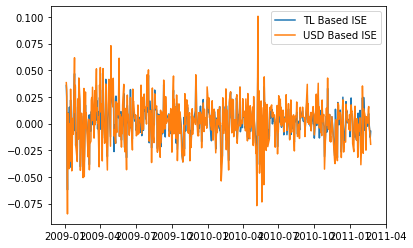


 Calculate how many times NIKKEI was higher than FTSE:  261


In [138]:
import pandas as pd
#Pull the IMKB data from UCI using pandas.
#i installed pandas, xlrd and openpyxl to read this file
data = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx")
print(data.head())

import matplotlib.pyplot as plt
print("Plot the TL based ISE and USD based ISE columns together in the same graph.: \n")
plt.plot(data.iloc[1:,0], data.iloc[1:,1], label = "TL Based ISE")
plt.plot(data.iloc[1:,0], data.iloc[1:,2], label = "USD Based ISE")
plt.legend()
plt.show()

print("\n Calculate how many times NIKKEI was higher than FTSE: ", 
     len(list(filter(lambda x: (x >0), (data.iloc[1:,6] - data.iloc[1:,5]).tolist()))))



# Question 9

Using the [networkx](https://networkx.org/) library

* Get the [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) of the [Peterson graph](https://en.wikipedia.org/wiki/Petersen_graph).
* Calculate its eigen-values and eigen-vectors using the [numpy](https://numpy.org/) library.
* Repeat the same for a [random 3-regular graph on 10 vertices](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.generators.random_graphs.random_regular_graph.html).

Peterson Adjacency matrix: 
 [[0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]]
Peterson Eigen values: 
 [-2.  1.  3.  1.  1. -2. -2. -2.  1.  1.]
Peterson Eigen vectors: 
 [[ 6.32455532e-01 -7.07106781e-01 -3.16227766e-01 -1.16247639e-01
  -1.31425264e-01 -4.16657625e-03  2.12511980e-02 -1.22003625e-02
   1.75727047e-01 -3.40075478e-02]
 [-4.21637021e-01 -2.35702260e-01 -3.16227766e-01 -3.87492129e-02
   3.55436792e-01  2.77771750e-03 -1.92332347e-01  4.50729582e-01
   3.23058440e-01  2.06094901e-01]
 [ 1.05409255e-01  2.35702260e-01 -3.16227766e-01  3.87492129e-02
   1.53454333e-01 -6.94429375e-04  5.36616403e-01 -3.76623111e-01
  -2.06180393e-01  6.07241588e-01]
 [ 1.05409255e-01  2.35702260e-01 -3.16227766e

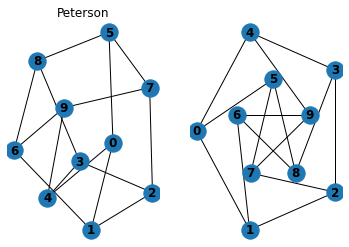

In [139]:
import networkx as nx
import matplotlib.pyplot as plt

#Reference: https://networkx.org/documentation/stable/tutorial.html
G = nx.petersen_graph()
plt.title("Peterson")
plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold')
plt.title("Peterson")
plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

#Get the adjacency matrix of the Peterson graph.
import scipy as sp
A = nx.adjacency_matrix(G)
print("Peterson Adjacency matrix: \n",A.todense())

#Calculate its eigen-values and eigen-vectors using the numpy library.
import numpy as np
w, v = np.linalg.eig(A.todense())
print ("Peterson Eigen values: \n", w)
print ("Peterson Eigen vectors: \n", v)

#Repeat the same for a random 3-regular graph on 10 vertices.
G2 = nx.random_regular_graph(2, 10, seed=1)

#Get the adjacency matrix of the Peterson graph.
import scipy as sp
A2 = nx.adjacency_matrix(G2)
print("Random Graph1 Adjacency matrix: \n",A2.todense())

#Calculate its eigen-values and eigen-vectors using the numpy library.
import numpy as np
w2, v2 = np.linalg.eig(A2.todense())
print ("Random Graph1 Eigen values: \n", w2)
print ("Random Graph1 Eigen vectors: \n", v2)


G3 = nx.random_regular_graph(4, 10, seed=1)
#Get the adjacency matrix of the Peterson graph.
import scipy as sp
A3 = nx.adjacency_matrix(G3)
print("Random Graph2 Adjacency matrix: \n",A3.todense())

#Calculate its eigen-values and eigen-vectors using the numpy library.
import numpy as np
w3, v3 = np.linalg.eig(A3.todense())
print ("Random Graph2 Eigen values: \n", w3)
print ("Random Graph2 Eigen vectors: \n", v3)


G4 = nx.random_regular_graph(6, 10, seed=1)
#Get the adjacency matrix of the Peterson graph.
import scipy as sp
A4 = nx.adjacency_matrix(G4)
print("Random Graph3 Adjacency matrix: \n",A3.todense())

#Calculate its eigen-values and eigen-vectors using the numpy library.
import numpy as np
w4, v4 = np.linalg.eig(A4.todense())
print ("Random Graph3 Eigen values: \n", w4)
print ("Random Graph3 Eigen vectors: \n", v4)